In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df = pd.read_csv('Datasets/PTEN_MCF10A_predictions_ref_set_binary_new.csv',
                index_col=False)
print(df.head(12))

   variant  MCF10A score  CADD  SNAP2  PolyPhen  SIFT  Cum_score  ground truth
0      K6E        0.3311  26.6     67     0.155  0.99   1.623520           NaN
1      K6I        0.4544  27.3     64     0.244  1.00   1.888279           NaN
2     R15S        0.3870  25.0     65     0.123  1.00   2.581101           1.0
3     M35V        0.3606  25.0     44     0.914  1.00   4.783403           1.0
4     P38H        0.3521  26.1     44     1.000  1.00   3.080331           NaN
5     G44D        0.6232  26.0     65     0.968  1.00  -0.216137           1.0
6     A79T        0.5711  23.0    -95     0.005  0.41   0.610590           NaN
7     D92N        0.2677  28.8     90     1.000  1.00   0.091202           NaN
8     H93Q        0.3301  26.1     77     1.000  1.00  -0.030278           0.0
9     H93R        0.3930  27.0     83     0.998  0.97   3.108621           0.0
10   I101F        0.8803  26.0      6     0.998  1.00   2.380877           NaN
11   I101T        0.7138  29.0     44     0.998  1.0

In [3]:
df = df.dropna().reset_index(drop=True)
print(df)

   variant  MCF10A score  CADD  SNAP2  PolyPhen  SIFT  Cum_score  ground truth
0     R15S        0.3870  25.0     65     0.123  1.00   2.581101           1.0
1     M35V        0.3606  25.0     44     0.914  1.00   4.783403           1.0
2     G44D        0.6232  26.0     65     0.968  1.00  -0.216137           1.0
3     H93Q        0.3301  26.1     77     1.000  1.00  -0.030278           0.0
4     H93R        0.3930  27.0     83     0.998  0.97   3.108621           0.0
5    H123Q        0.9934  25.0     82     0.998  0.98   4.544401           1.0
6    H123Y        0.6383  25.0     80     0.996  1.00   4.895643           1.0
7    C124S        0.8797  27.3     83     1.000  1.00   4.451413           1.0
8    C124R        0.6986  28.0     98     0.999  1.00   1.027467           1.0
9    G127R        0.9753  29.0     91     1.000  1.00   1.477588           1.0
10   G129R        0.8214  29.0     92     1.000  1.00   5.409764           1.0
11   G129E        0.8841  32.0     95     1.000  1.0

In [4]:
df['ground truth'].astype(int)

0     1
1     1
2     1
3     0
4     0
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    0
23    0
24    0
25    1
26    0
27    0
28    0
Name: ground truth, dtype: int64

In [5]:
# calculate ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_MCF10A, tpr_MCF10A, thresholds = roc_curve(df['ground truth'],
                                               df['MCF10A score'])
fpr_CADD, tpr_CADD, thresholds = roc_curve(df['ground truth'],
                                               df['CADD'])
fpr_SNAP2, tpr_SNAP2, thresholds = roc_curve(df['ground truth'],
                                               df['SNAP2'])
fpr_SIFT, tpr_SIFT, thresholds = roc_curve(df['ground truth'],
                                               df['SIFT'])
fpr_PolyPhen, tpr_PolyPhen, thresholds = roc_curve(df['ground truth'],
                                               df['PolyPhen'])
fpr_yeast, tpr_yeast, thresholds = roc_curve(df['ground truth'],
                                               df['Cum_score'])

In [6]:
# calculate the AUC for ROC curves

roc_auc_MCF10A = roc_auc_score(df['ground truth'], df['MCF10A score'])
roc_auc_CADD = roc_auc_score(df['ground truth'], df['CADD'])
roc_auc_SNAP2 = roc_auc_score(df['ground truth'], df['SNAP2'])
roc_auc_SIFT = roc_auc_score(df['ground truth'], df['SIFT'])
roc_auc_PolyPhen = roc_auc_score(df['ground truth'], df['PolyPhen'])
roc_auc_yeast = roc_auc_score(df['ground truth'], df['Cum_score'])

print('The ROC-AUC for {0} is {1:.3f}.'.format('MCF10A', roc_auc_MCF10A))
print('The ROC-AUC for {0} is {1:.3f}.'.format('CADD', roc_auc_CADD))
print('The ROC-AUC for {0} is {1:.3f}.'.format('SNAP2', roc_auc_SNAP2))
print('The ROC-AUC for {0} is {1:.3f}.'.format('SIFT', roc_auc_SIFT))
print('The ROC-AUC for {0} is {1:.3f}.'.format('PolyPhen2', roc_auc_PolyPhen))
print('The ROC-AUC for {0} is {1:.3f}.'.format('yeast', roc_auc_yeast))

The ROC-AUC for MCF10A is 0.970.
The ROC-AUC for CADD is 0.866.
The ROC-AUC for SNAP2 is 0.860.
The ROC-AUC for SIFT is 0.887.
The ROC-AUC for PolyPhen2 is 0.818.
The ROC-AUC for yeast is 0.792.


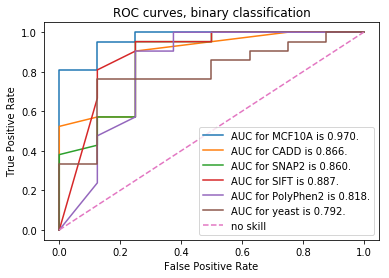

In [7]:
# plot the ROC curves for all the models
fig, ax = plt.subplots()
# plot the different scores
ax.plot(fpr_MCF10A, tpr_MCF10A, label='AUC for {0} is {1:.3f}.'.format('MCF10A', roc_auc_MCF10A))
ax.plot(fpr_CADD, tpr_CADD, label='AUC for {0} is {1:.3f}.'.format('CADD', roc_auc_CADD))
ax.plot(fpr_SNAP2, tpr_SNAP2, label='AUC for {0} is {1:.3f}.'.format('SNAP2', roc_auc_SNAP2))
ax.plot(fpr_SIFT, tpr_SIFT, label='AUC for {0} is {1:.3f}.'.format('SIFT', roc_auc_SIFT))
ax.plot(fpr_PolyPhen, tpr_PolyPhen, label='AUC for {0} is {1:.3f}.'.format('PolyPhen2', roc_auc_PolyPhen))
ax.plot(fpr_yeast, tpr_yeast, label='AUC for {0} is {1:.3f}.'.format('yeast', roc_auc_yeast))

# plot no skill line
ax.plot([0, 1], [0, 1], linestyle='--', label='no skill')

#ax.plot(r_SIFT, p_SIFT, label='SIFT')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curves, binary classification')
legend = ax.legend()

mpl.rcParams['pdf.fonttype'] = 42
plt.savefig('Output PDFs/roc_binary.pdf', transparent=True, dpi=200)

plt.show()

In [11]:
# calculate precision-recall curve
p_MCF10A, r_MCF10A, thresholds = precision_recall_curve(
    df['ground truth'], df['MCF10A score'])
p_CADD, r_CADD, thresholds = precision_recall_curve(
    df['ground truth'], df['CADD'])
p_SNAP2, r_SNAP2, thresholds = precision_recall_curve(
    df['ground truth'], df['SNAP2'])
p_SIFT, r_SIFT, thresholds = precision_recall_curve(
    df['ground truth'], df['SIFT'])
p_PolyPhen, r_PolyPhen, thresholds = precision_recall_curve(
    df['ground truth'], df['PolyPhen'])